# Index

#### 1. Import resources (Step 1)

#### 2. Pick out variables suitable for exploratory visual analysis (Step 2) 

#### 3. Create a correlation matrix heatmap (colored) (Step 3)

#### 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. (Step 4)

#### 5. Create a pair plot of the entire data set. (Step 5)

#### 6. Create a categorical plot and interpret the results. (Step 6)

#### 7. Revisit previous questions and add new questions. (Step 7)

#### 8. Define any hypotheses that you can at this point. You’ll be testing these later on. (Step 8)

### 1. Import resources (Step 1)

In [10]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

ImportError: cannot import name 'color' from 'seaborn' (C:\Users\zhoux\anaconda3\Lib\site-packages\seaborn\__init__.py)

In [2]:
# Define path
path = r'C:\Users\zhoux\Documents\CF-Data Analyst Program\DA-Immersion\Achievement 6\11-2023 Berlin Housing Price Analysis'

In [3]:
# Import dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cleaned.pkl'))

In [4]:
df.head()

,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
2110,Fernwärme,Kamin,15900000.0,546.00,9.0,3.57,10407.0,1875.0,1.0,29120.879121
3718,"Fußbodenheizung, offener",Zentralheizung,1650000.0,72.74,3.0,3.57,14193.0,1995.0,1.0,22683.530382
3959,na,na,4150000.0,191.40,3.0,2.38,10117.0,2015.0,4.0,21682.340648
4487,na,na,9900000.0,462.00,10.0,3.57,10117.0,2009.0,1.0,21428.571429
2232,na,na,6900000.0,326.90,9.0,3.57,10719.0,2022.0,5.0,21107.372285


### 2. Pick out variables suitable for exploratory visual analysis (Step 2) 

The variables suitable for exploratory visual analysis are price, area, rooms, fee, level and price_per_area. 

### 3. Create a correlation matrix heatmap (colored) (Step 3)

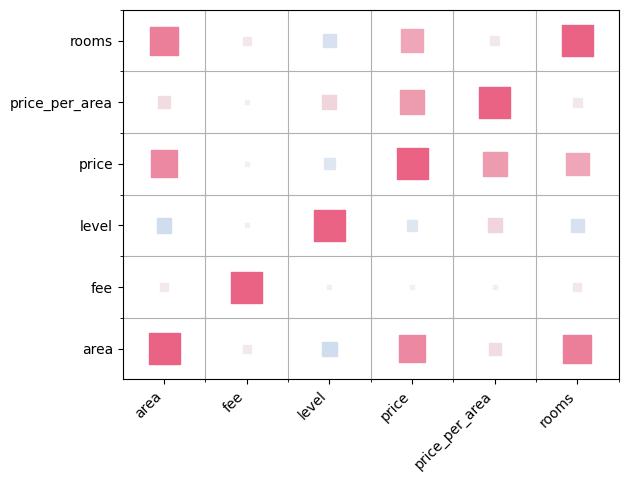

In [99]:
# with the help from 
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

sub = df[['price', 'area', 'rooms', 'fee', 'level', 'price_per_area']]
corr = sub.corr()
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(250, 0, n=n_colors, l=60, center="light") # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
# Map the corr value to the custom defined palette color range
def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

# Step 1 - Make a scatter plot with square markers, set column names as labels
def heatmap(x,y,size,color):
    fig,ax = plt.subplots()
    
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(x.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}
    
    size_scale = 500    
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale,
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s'
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation = 45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    # Move the grid so that the squares are centered in their cells
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    # Pad the left and bottom side by changing the axis' lower limits
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])   

# Unpivot the dataframe, so we can get pair of arrays for x and y
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

# Draw the custom heatmap
corr_plot=heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),  
    color=corr['value']
)

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_plot.png'), bbox_inches = 'tight')

The above heatmap (actually a scatter plot turned custom heatmap) uses size show the strength of correlations between variables. </br>
Because I used abs() - the absolute value of the coefficient, a larger size = a coefficient closer to 1 or -1 = a stronger positive/negative correlation. </br>

The strongest correlations are:
1. rooms - area
2. price - area
3. rooms - price
4. price - price_per_area 

</br>The modest correlations are:
1. price_per_area - area
2. level - area
3. level - room
4. price_per_area - level

</br>The weakest correlations are:
1. fee - area
2. fee - price_per_area
3. fee - price
4. fee - level
5. fee - rooms
6. price - level
7. rooms - price_per_area

However, despite the code guide in the link, with my current skills I find it challenging to add a color scale next to the plot. An alternative version of this plot is shown below: 

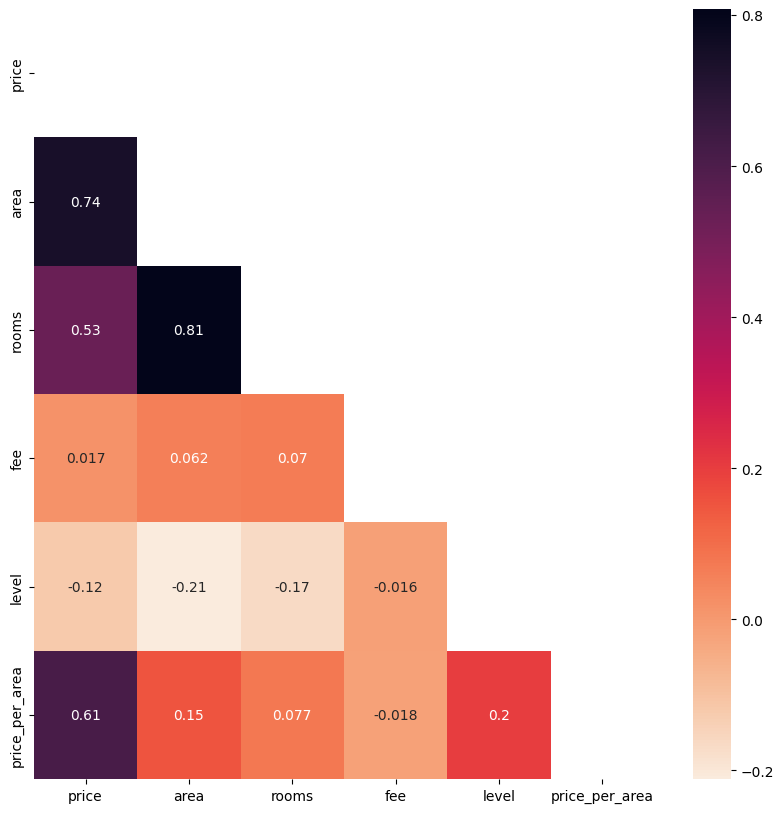

In [96]:
# A practice of masking the redundant half on the heatmap
corr = sub.corr()
f,ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(corr))
cmap = sns.cm.rocket_r
heatmap_alt = sns.heatmap(corr, annot=True, ax=ax, mask=mask, cmap=cmap)
heatmap_alt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_alt.png'))

### 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. (Step 4)

#### 4.1 Variable pair: rooms - area

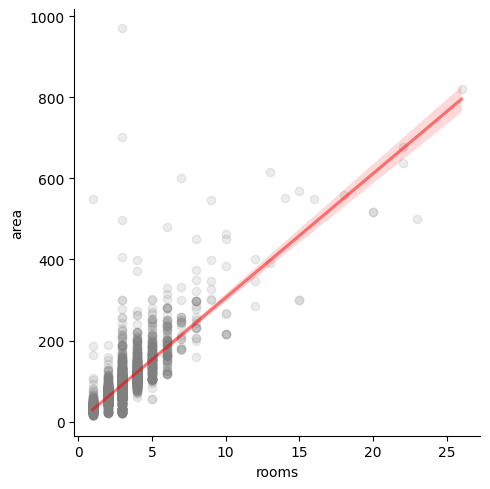

In [243]:
# Create a scatterplot for the "rooms" and "area" columns in seaborn
rooms_area = sns.lmplot(x = 'rooms', y = 'area', data = df, line_kws={'alpha':0.5,'color': 'red'}, scatter_kws={'alpha':0.15,'color': 'grey'})

In [244]:
rooms_area.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'rooms_area.png'))

Area and Rooms have a strong positive correlation. The more rooms a property has, the larger its area. Those outliers with very few rooms but an extremely large area are likely fraud listings.

#### 4.2 Variable pair: level - area

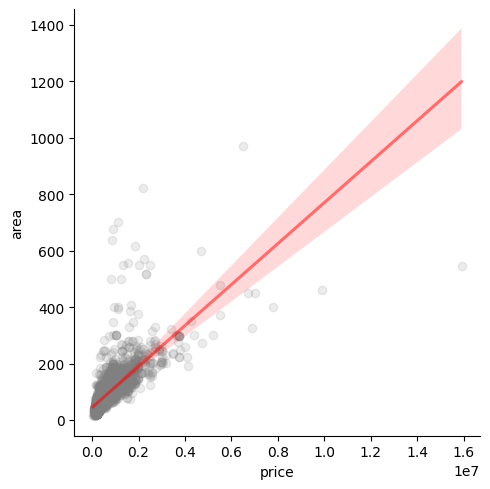

In [241]:
# Create a scatterplot for the "price" and "area" columns in seaborn
price_area = sns.lmplot(x = 'price', y = 'area', data = df, line_kws={'alpha':0.5,'color': 'red'}, scatter_kws={'alpha':0.15,'color': 'grey'})

In [242]:
price_area.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_area.png'))

Area and price have a strong positive correlation. The larger area a property has, the higher its price. Those outliers with a low price but an extremely large area are likely fraud listings.

### 4.3 Variable pair: rooms - price

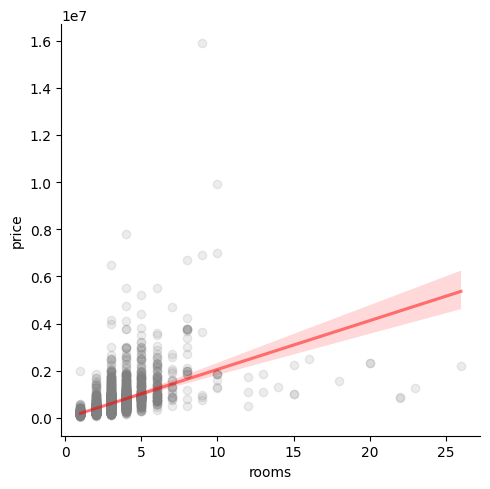

In [239]:
# Create a scatterplot for the "rooms" and "price" columns in seaborn
rooms_price = sns.lmplot(x = 'rooms', y = 'price', data = df, line_kws={'alpha':0.5,'color': 'red'}, scatter_kws={'alpha':0.15,'color': 'grey'})

In [240]:
rooms_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'rooms_price.png'))

Price and rooms have a somewhat weaker positive correlation. The more rooms a property has, the higher a price the property likely will have. Those outliers with a low price but a large count of rooms are likely fraud listings.

### 4.4 Variable pair: price - price_per_area

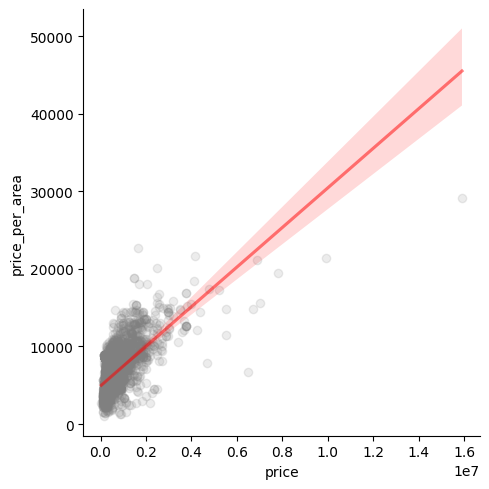

In [237]:
# Create a scatterplot for the "price" and "price_per_area" columns in seaborn
price_price_per_area = sns.lmplot(x = 'price', y = 'price_per_area', data = df, line_kws={'alpha':0.5,'color': 'red'}, scatter_kws={'alpha':0.15,'color': 'grey'})

In [238]:
price_price_per_area.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_price_per_area.png'))

Price and price_per_area have a moderately strong positive correlation. The higher a property's price-per-area is, the higher its total price. In this plot, fraud listings are not immediately identifiable, because the total area of the property is unknown. Due to its location, a property can be small and expensive, or large and cheap, or be somewhere in between.

## 5. Create a pair plot of the entire data set. (Step 5)

C:\Users\zhoux\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\zhoux\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\zhoux\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\zhoux\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\zhoux\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\zhoux\anaconda3\Lib\site-packages

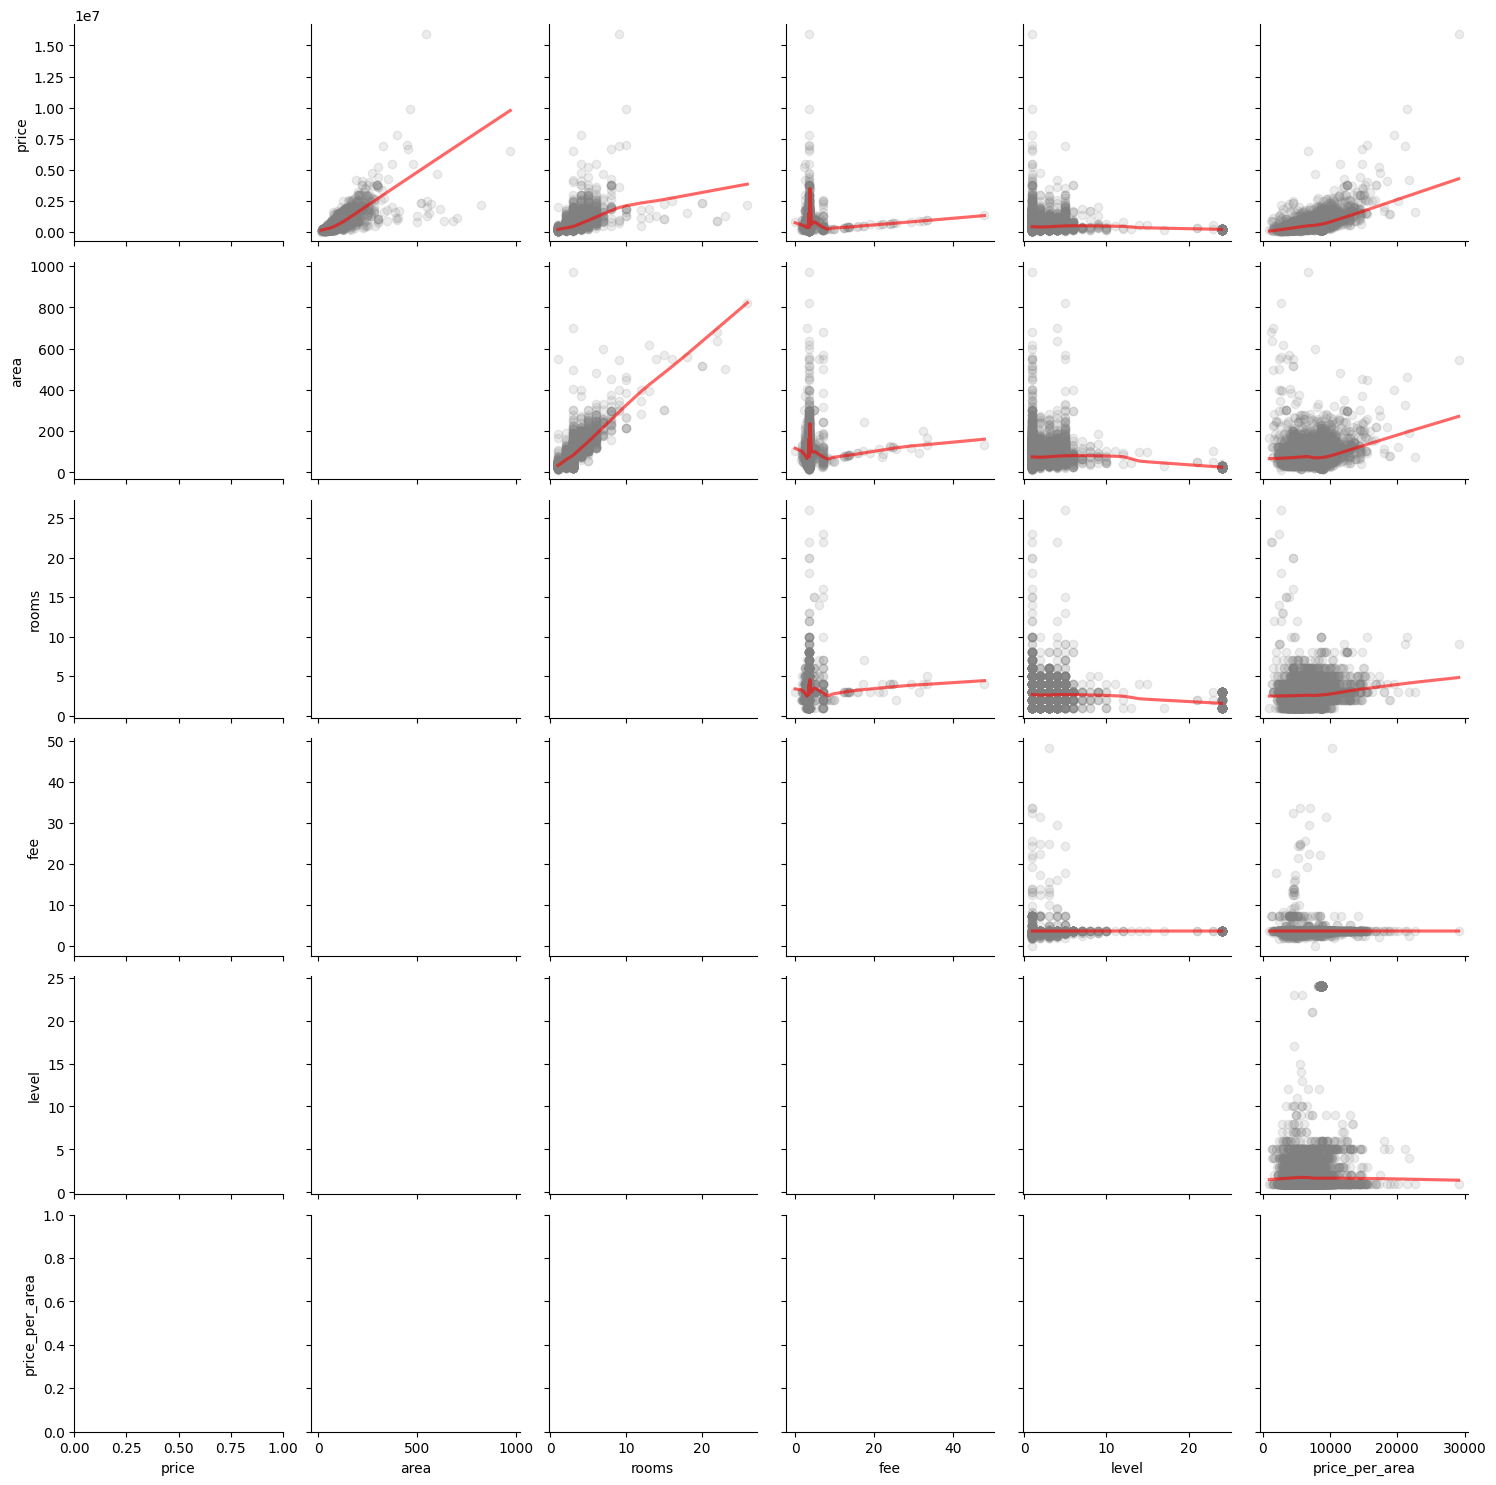

In [207]:
pair_grid = sns.PairGrid(sub)
pair_grid = pair_grid.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.15, 'color': 'grey'}, line_kws={'alpha':0.6,'color': 'red'})

In [208]:
pair_grid.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_grid.png'))

The pair plot with a linear regression model couldn't visualize some of the plots properly. After some search learned about pair grid and lowess curve; the combination suits the purpose perfectly. </br></br>
When I buy a property, the first thing I focus on will be price_per_area, which can be dependent on factors such as area, rooms, fee, level, district, construction year, etc. Even though the plot also includes the pair 'price'-'price_per_area', it is not directly relevant as price = price_per_area * area + fee (a roughly represented calculation). Therefore, my focus is on the right most column, minus the first row.</br>
</br>
Looking at this column, I came up with the following interpretations:
1. Fee is likely a fixed percentage across Berlin, and has little to no influence on price_per_area.
2. It seems that level, too, has little to no influence on price_per_area.
3. Rooms, area and price all have a positive correlation with price_per_area. Interestingly, the lines in these plots all has a very small slope in the first 1/3 section of price_per_area, Past the 1/3 section, the slope suddenly increased. 
</br> </br> 
It means that if the price_per_area is cheap (within 1/3 of its range), then it's hardly influenced by rooms and area. If the price_per_area is moderate to expensive (within the rest of its range), then it more likely is influenced by rooms and area.
</br> </br> 
Therefore, I want to further explore rooms, area and price_per_area. Because rooms and area don't influence price_per_area that much when price_per_area is cheap, I also wonder what is the relationship between price_per_area and district & construction year. 

## 6. Create a categorical plot and interpret the results. (Step 6)

In [170]:
sub['area'].describe()

count    4937.000000
mean       84.981057
std        58.016705
min        13.000000
25%        54.040000
50%        72.740000
75%       101.000000
max       970.000000
Name: area, dtype: float64

Based on the stats, I will divide 'area' in three categories: 
1. small: 0-50qm
2. middle: 50-100qm
3. large: 100qm+

In [172]:
sub.loc[sub['area'] <=50, 'property_size'] = 'small'

In [173]:
sub.loc[(sub['area'] >50) & (sub['area'] <=100), 'property_size'] = 'middle'

In [174]:
sub.loc[sub['area'] >100, 'property_size'] = 'large'

In [176]:
sub['property_size'].value_counts(dropna=False)

property_size
middle    2639
large     1264
small     1034
Name: count, dtype: int64

In [236]:
sub['price_per_area'].describe()

count     4937.000000
mean      6354.012572
std       2472.453375
min        997.581620
25%       4538.333333
50%       5843.852267
75%       8055.555556
max      29120.879121
Name: price_per_area, dtype: float64

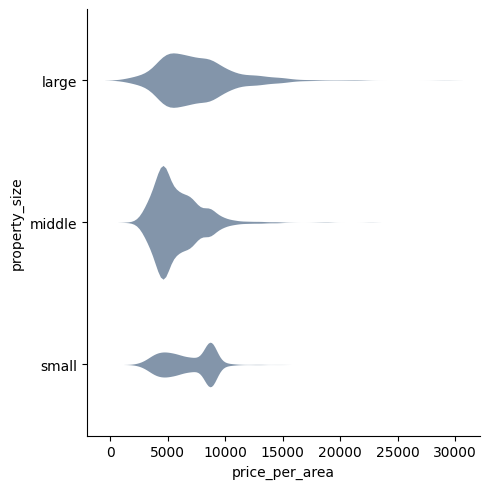

In [235]:
cat_plot_1 = sns.catplot(sub, 
                       x="price_per_area", 
                       y="property_size", 
                       kind='violin', 
                       inner=None, 
                       density_norm="count", 
                       color='#456990', 
                       linewidth=0, 
                       alpha=0.7)

This violin plot has the shapes normalized based on count. I have noticed the following points:
1. Small-sized properties can be divided into two categories based on the bump at the price-per-area around 80000. Left to the bump could be properties for households with low-middle income, and right to the bump could be targeting higher income single individuals. The price-per-area can go up to 15000.
2. Middle-sized properties have a rather dense distribution at the price-per-area around 5000. This category also have the highest counts (more than the sum of the other two categories). The price-per-area can also go up to 20000.
3. Large-sized properties have a more even distribution than middle-sized ones. While the price-per-area concentrates at 5000-10000, it can also go up to 30000.

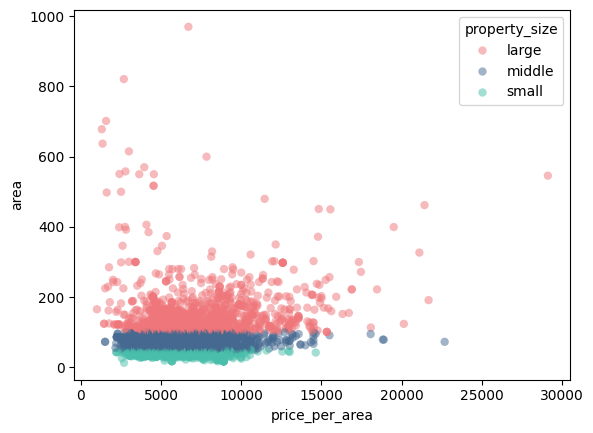

In [229]:
c=['#ef767a', '#456990', '#49beaa']
cat_plot_2 = sns.scatterplot(sub, 
                          x="price_per_area", 
                          y="area", 
                          hue='property_size', 
                          palette=c, 
                          linewidth = 0, 
                          alpha=0.5)

From this plot, we can see a rather consistent distribution of price_per_area when the property size is small and middle. Ignore the datapoints that have very low price_per_area with a large area, as they are likely frauds. </br>
Overall, it seems that the price per area is not highly influenced by how large a property is. If ever, then the property more likely has a large area. 

In [230]:
cat_plot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_plot_1.png'))
cat_plot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_plot_2.png'))

# 7. Revisit previous questions and add new questions. (Step 7)

Previous questions:
1. How do housing prices vary in different districts of Berlin?
2. Berlin has different types of propeties – for example, ‘Altbau’ (old/historical building), ‘Neubau’ (new building), and those that were built rapidly after the World War II, with a cheap price and bad quality. Are there any price differences in correlation to the construction year?
3. Which district(s) in Berlin tend to have larger floor area with a lower price?
4. Do the recently constructed properties have a larger area or smaller, are there any correlations?

The above questions are related to districts and construction year. These variables are not yet investigated, therefore, I do not yet have the full answer to these questions. </br>
However, the visual exploration so far has pointed direction: besides room and area, the price-of-area likely has to do with the construction year and districts. </br>
There is one thing interesting: Why are there a sum of small-sized apartments with relatively higher price-of-area? What is the target group and how are these properties distributed?

# 8. Define any hypotheses that you can at this point. (Step 8)

- District and construction year have a higher influence on a property's price-per-area than room count and property size. 